In [29]:
import numpy as np
import random
import json
import pandas as pd

# creating classes

In [25]:

class Sentiment():
    NEGATIVE = 'NEGATIVE'
    POSITIVE = 'POSITIVE'

class Review():
    def __init__(self,text,rating):
        self.text = text.replace('.','').replace(',','').replace('?','').replace('!','')
        self.rating = rating
        self.sentiment = self.get_sentiment()
    
    def get_sentiment(self):
        if self.rating > 2.5:
            return Sentiment.POSITIVE
        else:
            return Sentiment.NEGATIVE

class ReviewContainer():  
    def __init__(self ,reviews):
        self.reviews = reviews
    
    def get_text(self):
        return [x.text for x  in self.reviews]
    
    def get_sentiment(self):
        return [x.sentiment for x in self.reviews]
    
    def evenly_distribute(self):
        negitive_reviews = list(filter(lambda x : x.sentiment == Sentiment.NEGATIVE , self.reviews))
        positive_reviews = list(filter(lambda x : x.sentiment == Sentiment.POSITIVE , self.reviews))
        random.shuffle(positive_reviews)
        positive_reviews = positive_reviews[:len(negitive_reviews)]
        self.reviews = negitive_reviews + positive_reviews
        random.shuffle(self.reviews)

# Collecting DATA from JSON

In [26]:
reviews = []
with open('Books_small_10000.json') as file:
    for line in file:
        review = json.loads(line)
#         print(review)
        reviews.append(Review(review['reviewText'],review['overall']))
        
    
print(reviews[n].text)
print()
print(reviews[n].rating)
print()
print(reviews[n].sentiment)
        

Former co-teacher and national presenter Anne Beninghof shares stories and real-life co-taught lesson examples that emphasize creative yet time-efficient instructional strategies that lend themselves beautifully to the co-taught classroom Teachers and instructional leaders at all levels and in a wide variety of content areas will find this book replete with valuable co-teaching guidance so that success is guaranteedOffers tips for effective teaching strategies for every type of team teaching situation imaginableIncludes guidelines for successful team-teaching with specialists in technology; literacy; occupational/physical therapy; special education; speech-language therapy; ELL; giftedThe author is an internationally recognized consultant and trainerThis user-friendly comprehensive book is filled with concrete ideas teachers can implement immediately in the classroom to boost student learning and engagement

5.0

POSITIVE


In [30]:
df = pd.DataFrame(data = {
    'reviewText' : [x.text for x in reviews],
    'rating' : [x.rating for x in reviews],
    'sentiment' : [x.sentiment for x in reviews]
})
df.head()

,reviewText,rating,sentiment
0,I bought both boxed sets books 1-5 Really a g...,5.0,POSITIVE
1,I enjoyed this short book But it was way way t...,3.0,POSITIVE
2,I love Nicholas Sparks I&#8217;ve read everyth...,4.0,POSITIVE
3,I really enjoyed this adventure and look forwa...,4.0,POSITIVE
4,It was a decent read typical story line Nothin...,3.0,POSITIVE


In [31]:
df[df.sentiment == Sentiment.NEGATIVE]

,reviewText,rating,sentiment
6,The book has the fevered intensity of Oliver S...,2.0,NEGATIVE
47,I read the full account so felt this was a was...,1.0,NEGATIVE
50,Did not enjoy this book it was boring and end...,1.0,NEGATIVE
52,this book is too much like the wheatbelly book...,2.0,NEGATIVE
54,Was not really sure what this book was about ...,2.0,NEGATIVE
...,...,...,...
9981,I am very picky when it comes to what I like t...,1.0,NEGATIVE
9982,*I received a free copy of this book to read a...,2.0,NEGATIVE
9984,Having this book toted as a YA series on Amazo...,1.0,NEGATIVE
9993,I've tried to start this graphic novel a coupl...,2.0,NEGATIVE


In [34]:
df.sentiment.value_counts()

POSITIVE    9356
NEGATIVE     644
Name: sentiment, dtype: int64

In [35]:
df.rating.value_counts()

5.0    5930
4.0    2448
3.0     978
2.0     375
1.0     269
Name: rating, dtype: int64

In [36]:
len(df)

10000

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

/home/rgukt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

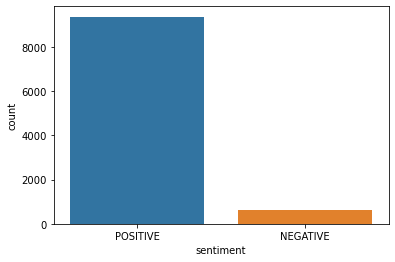

In [44]:
sns.countplot(df.sentiment)

**balnced data**

In [37]:
balanced_reviews = ReviewContainer(reviews)
balanced_reviews.evenly_distribute()

In [40]:
len(balanced_reviews.get_text())

1288

In [41]:
len(balanced_reviews.get_sentiment())

1288

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

/home/rgukt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

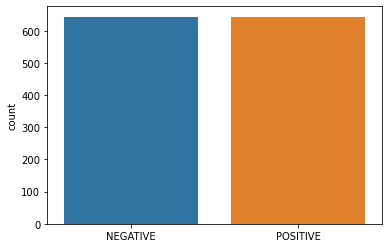

In [43]:
sns.countplot(balanced_reviews.get_sentiment())

In [47]:
new_df = pd.DataFrame( data = {
    'reviews' : balanced_reviews.get_text(),
    'sentiment' : balanced_reviews.get_sentiment()
})

In [48]:
new_df.head()

,reviews,sentiment
0,i like to read good but wholesome books the au...,NEGATIVE
1,Yikes This book was like reading a 'horror mov...,NEGATIVE
2,I didn't enjoy reading these books at all it w...,NEGATIVE
3,A book I just could not finish A woman alone i...,NEGATIVE
4,bored with sereis couldn't finsih it to long l...,POSITIVE


In [49]:
new_df.count()

reviews      1288
sentiment    1288
dtype: int64

**data spliting**

In [54]:
X = new_df['reviews']
Y = new_df['sentiment']

In [53]:
from sklearn.model_selection import train_test_split

In [55]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,random_state=45 , stratify= Y, test_size = 0.25)
print(len(x_train))
print(len(x_test))

966
322


**processing data**

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer()

In [59]:
x_train_vectorized = vectoriser.fit_transform(x_train)
x_test_vectorized = vectoriser.transform(x_test)

In [64]:
print(x_test.iloc[4])
print()
print(x_test_vectorized[4])

I really enjoyed this story it was a sweet loving tale that you could simply relax and read  I smiled and laughed with the characters and the fact that it was set in a place I've been and knew many of the spots and locals indicated in the book only made it much more entertaining for me  Loved the Maine setting

  (0, 10474)	0.0869689622595838
  (0, 10316)	0.07723608549093687
  (0, 10122)	0.13138260372809973
  (0, 9950)	0.13856161458082972
  (0, 9375)	0.05280166932543683
  (0, 9304)	0.22967899108868126
  (0, 9291)	0.14136007233323442
  (0, 9153)	0.20350588523004237
  (0, 9104)	0.18666793020680852
  (0, 8869)	0.08198242648851276
  (0, 8736)	0.2828773239664221
  (0, 8449)	0.18666793020680852
  (0, 8287)	0.20096357166736348
  (0, 8283)	0.18666793020680852
  (0, 7674)	0.2828773239664221
  (0, 7548)	0.09992460417756086
  (0, 7521)	0.07587579510066204
  (0, 6977)	0.16793995053089927
  (0, 6551)	0.11998406524527978
  (0, 6477)	0.05715615563186409
  (0, 6163)	0.11025970662740107
  (0, 6119)	0.0

# Creating models

->svm

->Decision Tree

->LogisticRegression

->Random forest


In [69]:
print(x_test[13])
print()
print(y_test[13])

For a story this short it took a long time for the author to get to the point  I found myself skipping pages waiting for something to happen

NEGATIVE


**Support vector machine**

In [75]:
from sklearn.svm import SVC
clf_svm = SVC(kernel='linear')
clf_svm.fit(x_train_vectorized , y_train)
clf_svm.predict(x_test_vectorized[13])

array(['NEGATIVE'], dtype=object)

**Decision Tree**

In [79]:
from sklearn.tree import DecisionTreeClassifier
clf_dtc = DecisionTreeClassifier()
clf_dtc.fit(x_train_vectorized , y_train)
clf_dtc.predict(x_test_vectorized[13])

array(['NEGATIVE'], dtype=object)

**Random forest**

In [81]:
from sklearn.ensemble import RandomForestClassifier

clf_rfc = RandomForestClassifier()
clf_rfc.fit(x_train_vectorized , y_train)
clf_rfc.predict(x_test_vectorized[13])

array(['NEGATIVE'], dtype=object)

**LogisticRegression**

In [82]:
from sklearn.linear_model import LogisticRegression

clf_lrc = LogisticRegression()
clf_lrc.fit(x_train_vectorized , y_train)
clf_lrc.predict(x_test_vectorized[13])

array(['POSITIVE'], dtype=object)

# Evalution

**comparing the scores of models**

In [84]:
print(clf_svm.score(x_test_vectorized,y_test))
print(clf_dtc.score(x_test_vectorized,y_test))
print(clf_rfc.score(x_test_vectorized , y_test))
print(clf_lrc.score(x_test_vectorized,y_test))

0.8291925465838509
0.6583850931677019
0.8198757763975155
0.8136645962732919


**Tuning the best model(Grid Search)**

In [88]:
from sklearn.model_selection import GridSearchCV

parameters =  {
    'C':[0.5,1,5,10,15],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid']
}

svc = SVC()
classifier = GridSearchCV(svc , parameters , cv = 5)
classifier.fit(x_train_vectorized , y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.5, 1, 5, 10, 15],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [89]:
classifier.best_score_

0.8115805779605791

In [90]:
classifier.best_params_

{'C': 0.5, 'kernel': 'linear'}

In [92]:
classifier.score(x_test_vectorized , y_test)

0.8291925465838509

# Saving the model

In [94]:
import pickle

In [95]:
with open('sentiment_classifier.pkl', 'wb') as model:
    pickle.dump(classifier,model)

# Loading the model 

In [96]:
model= pickle.load(open('sentiment_classifier.pkl', 'rb'))

# Predictive System

In [105]:
def find_sentiment(text):
    processed_text = text.replace('.','').replace(',','').replace('?','').replace('!','').replace('#','')
    vectorized_text = vectoriser.transform([processed_text])
    return model.predict(vectorized_text)[0]

In [106]:
text = 'this is good'
find_sentiment(text)

'POSITIVE'

In [107]:
text = 'not much interesting'
find_sentiment(text)

'NEGATIVE'

In [109]:
text = 'this is an interesting book'
find_sentiment(text)

'POSITIVE'